In [18]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)
tf.compat.v1.enable_eager_execution()
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def generate_sine_data(seq_len=50, num_samples=1000):
    X, y = [], []
    for _ in range(num_samples):
        start = np.random.uniform(0, 2 * np.pi)
        freq = np.random.uniform(0.1, 0.5)
        seq = np.sin(np.linspace(start, start + freq * seq_len, seq_len + 1))
        X.append(seq[:-1])
        y.append(seq[-1])
    X = np.array(X).reshape(num_samples, seq_len, 1)
    y = np.array(y).reshape(num_samples, 1)
    return X, y

X, y = generate_sine_data(seq_len=30)
X_train, X_val = X[:800], X[800:]
y_train, y_val = y[:800], y[800:]

In [20]:
def build_plain_rnn():
    inputs = layers.Input(shape=(30, 1))
    x = layers.SimpleRNN(64, return_sequences=True)(inputs)
    x = layers.SimpleRNN(64)(x)
    outputs = layers.Dense(1)(x)
    return models.Model(inputs, outputs, name="plain_rnn")

def build_residual_rnn():
    inputs = layers.Input(shape=(30, 1))
    x = layers.SimpleRNN(64, return_sequences=True)(inputs)
    skip = x 
    x = layers.SimpleRNN(64, return_sequences=True)(x)
    x = layers.Add()([x, skip])  
    x = layers.SimpleRNN(64)(x)
    outputs = layers.Dense(1)(x)
    return models.Model(inputs, outputs, name="residual_rnn")

In [22]:
plain_rnn = build_plain_rnn()
res_rnn = build_residual_rnn()

plain_rnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                    loss='mse')

res_rnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='mse')

In [23]:
history_plain = plain_rnn.fit(X_train, y_train, epochs=60, validation_data=(X_val, y_val), verbose=1)

Epoch 1/60


c:\Users\Bluepal\anaconda3\envs\python_course\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - loss: 0.1087 - val_loss: 0.0083
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - loss: 0.0064 - val_loss: 0.0017
Epoch 3/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - loss: 0.0011 - val_loss: 0.0012
Epoch 4/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - loss: 5.4332e-04 - val_loss: 7.2955e-04
Epoch 5/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - loss: 4.1521e-04 - val_loss: 4.0113e-04
Epoch 6/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - loss: 3.6792e-04 - val_loss: 4.1120e-04
Epoch 7/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - loss: 2.7320e-04 - val_loss: 2.9879e-04
Epoch 8/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - loss: 2.4087e-04 - val_loss: 3.0304e-04
Epoch 9/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - loss: 2.2510e-04 - val_loss: 2.3324e-04
Epoch 10/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - loss: 2.0370e-04 - val_loss: 2.3343e-04
Epoch 11/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - loss: 1.8004e-04 - val_loss: 1.9324e-04
Epoch 12/60
25/25 ━━━

In [24]:

history_res = res_rnn.fit(X_train, y_train, epochs=60, validation_data=(X_val, y_val), verbose=1)

Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - loss: 0.1220 - val_loss: 0.0198
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - loss: 0.0088 - val_loss: 0.0038
Epoch 3/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - loss: 0.0031 - val_loss: 0.0015
Epoch 4/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - loss: 0.0015 - val_loss: 9.6682e-04
Epoch 5/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - loss: 6.7981e-04 - val_loss: 7.4026e-04
Epoch 6/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - loss: 5.4426e-04 - val_loss: 6.9255e-04
Epoch 7/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - loss: 4.7275e-04 - val_loss: 5.2602e-04
Epoch 8/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - loss: 3.7858e-04 - val_loss: 5.0177e-04
Epoch 9/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - loss: 3.2417e-04 - val_loss: 6.7503e-04
Epoch 10/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - loss: 3.6907e-04 - val_loss: 3.7479e-04
Epoch 11/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - loss: 4.2772e-04 - val_loss: 4.0413e-04
Epoch 12/60
25

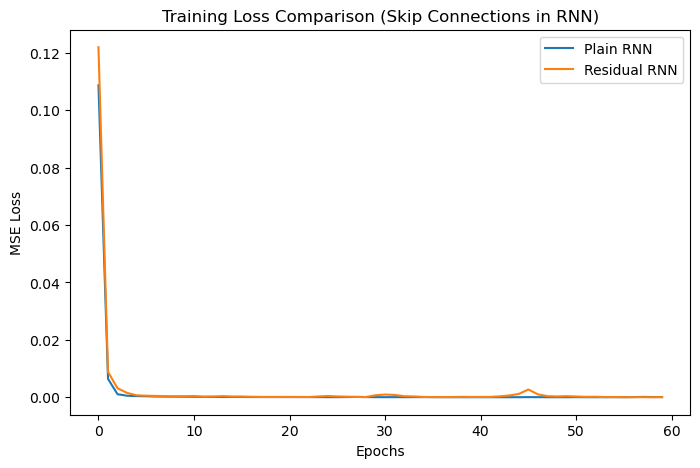

In [25]:
plt.figure(figsize=(8,5))
plt.plot(history_plain.history['loss'], label='Plain RNN')
plt.plot(history_res.history['loss'], label='Residual RNN')
plt.title("Training Loss Comparison (Skip Connections in RNN)")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()